In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

if tf.config.list_logical_devices("GPU"):
    print("Cuda is availible!")
else:
    print("CPU will use.")

Cuda is availible!


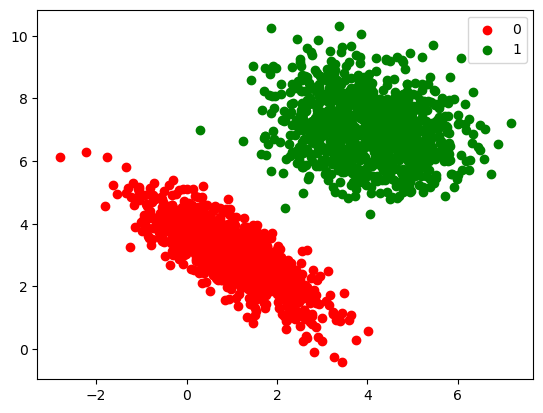

In [2]:
dots_0 = np.random.multivariate_normal(mean=[1,3], 
                                       cov=[[1, -0.8], 
                                            [-0.8, 1]], 
                                       size=1000).astype(np.float32)
dots_1 = np.random.multivariate_normal(mean=[4,7], 
                                       cov=[[1, -0.2], 
                                            [-0.2, 1]],
                                       size=1000).astype(np.float32)

plt.figure()
plt.scatter(dots_0[:,0], dots_0[:,1], color="red", label="0")
plt.scatter(dots_1[:,0], dots_1[:,1], color="green", label="1")
plt.legend()
plt.show()

In [3]:
target_0 = np.full(shape=(1000,1), fill_value=0, dtype=np.float32)
target_1 = np.full(shape=(1000,1), fill_value=1, dtype=np.float32)

dots = np.vstack([dots_0, dots_1])
targets = np.vstack([target_0, target_1])

print(dots.shape, targets.shape)

(2000, 2) (2000, 1)


In [4]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(input):
    return tf.matmul(input, W) + b

def loss_fn(predicts, targets):
    square = tf.square(predicts - targets)
    loss = tf.reduce_mean(square) + 0.5*tf.norm(W)
    return loss

In [5]:
learning_rate = 0.01
num_epoch = 250

for i in range(num_epoch):
    print(f"{'-'*10}Epoch: {i + 1}{'-'*10}")
    with tf.GradientTape() as tape:
        prediction = model(dots)
        loss = loss_fn(prediction, targets)
    gradient_w, gradient_b = tape.gradient(loss, [W, b])
    W.assign_add(-gradient_w * learning_rate)
    b.assign_add(-gradient_b * learning_rate)
    print(f"Loss: {loss}")

----------Epoch: 1----------
Loss: 9.835440635681152
----------Epoch: 2----------
Loss: 1.4756454229354858
----------Epoch: 3----------
Loss: 1.0372883081436157
----------Epoch: 4----------
Loss: 0.9595335721969604
----------Epoch: 5----------
Loss: 0.9015209674835205
----------Epoch: 6----------
Loss: 0.8478931784629822
----------Epoch: 7----------
Loss: 0.797747790813446
----------Epoch: 8----------
Loss: 0.7508347630500793
----------Epoch: 9----------
Loss: 0.7069463729858398
----------Epoch: 10----------
Loss: 0.6658893823623657
----------Epoch: 11----------
Loss: 0.6274833679199219
----------Epoch: 12----------
Loss: 0.5915591716766357
----------Epoch: 13----------
Loss: 0.5579586029052734
----------Epoch: 14----------
Loss: 0.5265341401100159
----------Epoch: 15----------
Loss: 0.4971473217010498
----------Epoch: 16----------
Loss: 0.4696688652038574
----------Epoch: 17----------
Loss: 0.44397783279418945
----------Epoch: 18----------
Loss: 0.419961154460907
----------Epoch: 19--

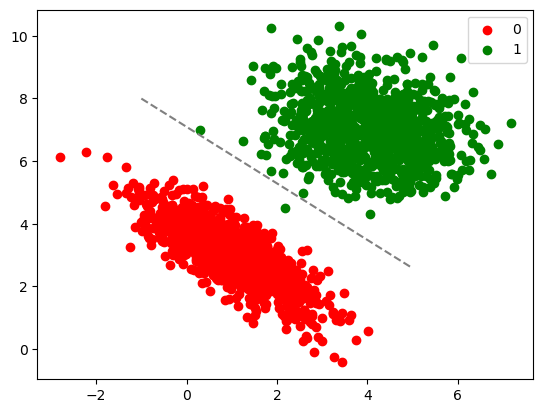

In [6]:
def f(x):
    return -W[0] / W[1] * x + (0.5 - b) / W[1]

plt.figure()
plt.scatter(dots_0[:,0], dots_0[:,1], color="red", label="0")
plt.scatter(dots_1[:,0], dots_1[:,1], color="green", label="1")
x = np.linspace(-1, 5, 100)
y = f(x)
plt.plot(x, y, linestyle="--", color="grey") 
plt.legend()
plt.show()